In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Data collection

In [39]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. EDA and Data manipulation

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
def get_missingval_percent(df):
    for i in range(len(df.columns)):
        print('Missing values percentage of column',df.columns[i],': ', (df[df.columns[i]].isna().sum()/len(df))*100)
        
get_missingval_percent(df)

Missing values percentage of column PassengerId :  0.0
Missing values percentage of column Survived :  0.0
Missing values percentage of column Pclass :  0.0
Missing values percentage of column Name :  0.0
Missing values percentage of column Sex :  0.0
Missing values percentage of column Age :  19.865319865319865
Missing values percentage of column SibSp :  0.0
Missing values percentage of column Parch :  0.0
Missing values percentage of column Ticket :  0.0
Missing values percentage of column Fare :  0.0
Missing values percentage of column Cabin :  77.10437710437711
Missing values percentage of column Embarked :  0.22446689113355783


In [44]:
df.drop(['Cabin'], inplace=True, axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

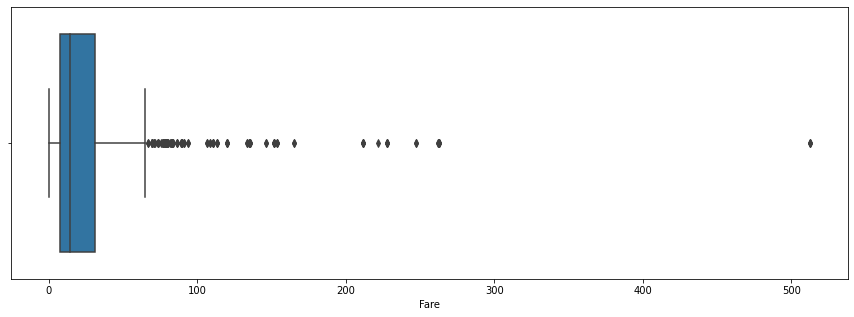

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (15,5))
sns.boxplot(df['Fare'])

<AxesSubplot:>

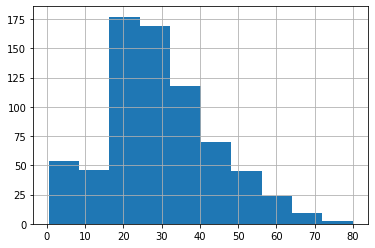

In [46]:
df['Age'].hist()

In [47]:
print('Before Imputation -',df['Age'].isna().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
print('After Imputation -', df['Age'].isna().sum())

Before Imputation - 177
After Imputation - 0


<AxesSubplot:>

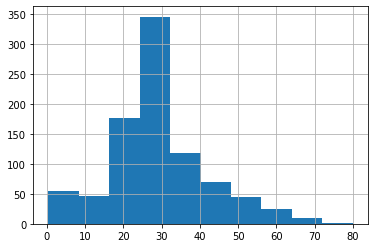

In [48]:
df['Age'].hist()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

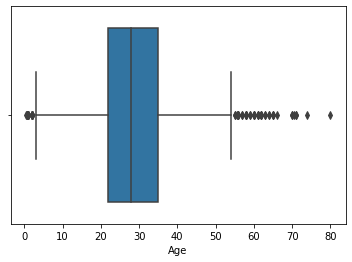

In [49]:
sns.boxplot(df['Age'])

In [50]:
print('Before Imputation -',df.Embarked.isna().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print('After Imputation -', df['Embarked'].isna().sum())

Before Imputation - 2
After Imputation - 0


<AxesSubplot:>

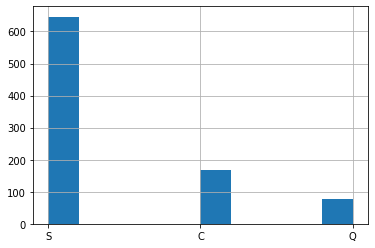

In [51]:
df['Embarked'].hist()

In [52]:
df.pivot_table(values='Survived', index='Embarked', columns=['Sex'])

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.692683,0.174603


<AxesSubplot:xlabel='Embarked'>

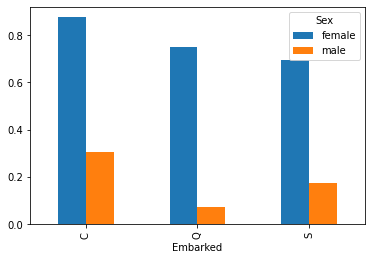

In [53]:
df.pivot_table(values='Survived', index='Embarked', columns=['Sex']).plot(kind='bar')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [55]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [56]:
dummy = pd.get_dummies(df.Sex)
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [57]:
df.drop('Sex', inplace=True, axis =1)
df = pd.concat([df, dummy],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  female       891 non-null    uint8  
 11  male         891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 71.5+ KB


In [60]:
df = df.drop(['Name', "Ticket"], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,2,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,2,1,0
3,4,1,1,35.0,1,0,53.1000,2,1,0
4,5,0,3,35.0,0,0,8.0500,2,0,1


In [61]:
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df.Survived

In [62]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_scaled = s.fit_transform(X)
X_scaled

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.58595414,
        -0.73769513,  0.73769513],
       [-1.56610693,  0.66386103,  0.43279337, ..., -1.9423032 ,
         1.35557354, -1.35557354],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.58595414,
         1.35557354, -1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.58595414,
         1.35557354, -1.35557354],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -1.9423032 ,
        -0.73769513,  0.73769513],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.67817453,
        -0.73769513,  0.73769513]])

# 3. Train-Test-Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4243, stratify=y)

In [64]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

print('Distribution of survival values in train data - ', round(Counter(y_train)[1]/len(y_train), 3))
print('Distribution of survival values in test data - ', round(Counter(y_test)[1]/len(y_test), 3))

Counter({0: 439, 1: 273})
Counter({0: 110, 1: 69})
Distribution of survival values in train data -  0.383
Distribution of survival values in test data -  0.385


# 4. ML modeling and metrics

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [66]:
print('Training Logistic',lr.score(X_train, y_train))
predict = lr.predict(X_test)
print('Testing Logistic',accuracy_score(predict, y_test))

Training Logistic 0.7949438202247191
Testing Logistic 0.8156424581005587


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=7, min_weight_fraction_leaf=0.00001)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_weight_fraction_leaf=1e-05,
                       n_estimators=1000)

In [68]:
print('Training RandomForest',rf.score(X_train, y_train))
predict = rf.predict(X_test)
print('Testing RandomForest',accuracy_score(predict, y_test))

Training RandomForest 0.898876404494382
Testing RandomForest 0.8379888268156425


In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
print('Training XGBOOST',xgb.score(X_train, y_train))
predict = xgb.predict(X_test)
print('Testing XGBOOST',accuracy_score(predict, y_test))

Training XGBOOST 0.9747191011235955
Testing XGBOOST 0.7932960893854749


# 5. Validation

In [71]:
from sklearn.model_selection import cross_validate, StratifiedKFold

score = cross_validate(lr, X, y, cv=10, scoring = ('r2', 'neg_mean_squared_error', 'roc_auc'))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [72]:
score

{'fit_time': array([0.03231287, 0.02890015, 0.02839446, 0.02989864, 0.02911711,
        0.02939463, 0.0315032 , 0.02789974, 0.02729821, 0.02848172]),
 'score_time': array([0.00506902, 0.00501609, 0.00502801, 0.00513816, 0.0052259 ,
        0.00502348, 0.00633359, 0.00506806, 0.00497794, 0.00498033]),
 'test_r2': array([0.11168831, 0.14331551, 0.00053476, 0.19090909, 0.09572193,
        0.00053476, 0.09572193, 0.09572193, 0.19090909, 0.34074074]),
 'test_neg_mean_squared_error': array([-0.21111111, -0.20224719, -0.23595506, -0.19101124, -0.21348315,
        -0.23595506, -0.21348315, -0.21348315, -0.19101124, -0.15730337]),
 'test_roc_auc': array([0.84883117, 0.83743316, 0.79919786, 0.88101604, 0.85614973,
        0.84812834, 0.86042781, 0.83582888, 0.87914439, 0.87037037])}

In [73]:
skf = StratifiedKFold(n_splits=10)

In [74]:
lr_score = []
rf_score = []
xgb_score = []

def get_score(train, test, fold_no, model):
    x_train = train.drop(['Survived'],axis=1)
    y_train = train.Survived
    x_test = test.drop(['Survived'],axis=1)
    y_test = test.Survived
    model.fit(x_train, y_train)
    return model.score(x_test,y_test)
  

fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    lr_score.append(get_score(train, test, fold_no, lr))
    rf_score.append(get_score(train, test, fold_no, rf))
    xgb_score.append(get_score(train, test, fold_no, xgb))
    fold_no += 1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [75]:
lr_score

[0.7888888888888889,
 0.8314606741573034,
 0.7752808988764045,
 0.8314606741573034,
 0.7752808988764045,
 0.7528089887640449,
 0.7865168539325843,
 0.7752808988764045,
 0.8089887640449438,
 0.7752808988764045]

In [76]:
rf_score

[0.8111111111111111,
 0.8426966292134831,
 0.7528089887640449,
 0.898876404494382,
 0.898876404494382,
 0.8314606741573034,
 0.8539325842696629,
 0.7752808988764045,
 0.8651685393258427,
 0.8202247191011236]

In [77]:
xgb_score

[0.7666666666666667,
 0.7078651685393258,
 0.7303370786516854,
 0.6067415730337079,
 0.7865168539325843,
 0.8426966292134831,
 0.8202247191011236,
 0.7640449438202247,
 0.8089887640449438,
 0.8314606741573034]

# 7. Submission Kaggle

In [78]:
df_test = pd.read_csv('../input/titanic/test.csv')
dummy = pd.get_dummies(df_test.Sex)
df_test.drop(['Sex','Name','Ticket','Cabin'], inplace=True, axis =1)
df_test = pd.concat([df_test, dummy],axis=1)
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
print(df_test.isna().sum())
print(df_test.head())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
female         0
male           0
dtype: int64
   PassengerId  Pclass   Age  SibSp  Parch     Fare  Embarked  female  male
0          892       3  34.5      0      0   7.8292         1       0     1
1          893       3  47.0      1      0   7.0000         2       1     0
2          894       2  62.0      0      0   9.6875         1       0     1
3          895       3  27.0      0      0   8.6625         2       0     1
4          896       3  22.0      1      1  12.2875         2       1     0


In [79]:
test_pred = lr.predict(df_test)
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
output = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived': (test_pred).astype('int64')})
output.to_csv('submission.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 8. Bonus

In [81]:
! pip install data-purifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 216.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 763.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Unidecode
    Found existing installation: Unidecode 1.3.4
    Uninstalling Unidecode-1.3.4:
      Successfully uninstalled Unidecode-1.3.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.1
    Uninstalling widgetsnbextension-3.6.1:
      Successfully uninstalled widgetsnbextension-3.6.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7

In [82]:
import datapurifier as dp
from datapurifier import Mleda, MlReport

df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of DataFrame:  (891, 12)

Sample of Dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q



There are total 5 categorical and 7 numerical columns

Description of Data:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Null Information of Dataframe: 


There are total 3 columns having null values out of 12 columns in dataframe



,column_name,null_rows,null_percentage
0,Cabin,687,77.104377
1,Age,177,19.865320
2,Embarked,2,0.224467



Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



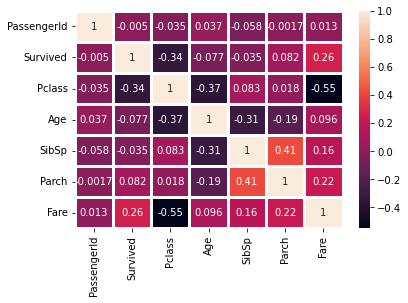

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'),…

In [83]:
ed = Mleda(df)

In [84]:
re = MlReport(df)


Sample of Dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Shape of DataFrame:  (891, 12)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

There are total 5 categorical and 7 numerical columns

Uniquess information of Dataset:



,column,unique_count,unique_percent
0,PassengerId,891,100.000000
1,Survived,2,0.224467
2,Pclass,3,0.336700
3,Name,891,100.000000
4,Sex,2,0.224467
5,Age,88,9.876543
6,SibSp,7,0.785634
7,Parch,7,0.785634
8,Ticket,681,76.430976
9,Fare,248,27.833895


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Null Information of Dataframe: 


There are total 3 columns having null values out of 12 columns in dataframe



,column_name,null_rows,null_percentage
0,Cabin,687,77.104377
1,Age,177,19.865320
2,Embarked,2,0.224467
